<a href="https://colab.research.google.com/github/AfrahAlharbi/FinalProject-SDA/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction 

This notebook is divided into 6 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries ](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [Model Building](#data-model)


## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 14 features and a target variable.The detailed description of all the features are as follows:

**1- age:** The person's age in years

**2- sex:** The person's sex (1 = male, 0 = female)

**3- cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**4- trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)

**5- chol:** The person's cholesterol measurement in mg/dl

**6- fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**7- restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**8- thalach:** The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**9- slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**10- ca:** The number of major vessels (0-3)

**11- thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)

**13- target:** Heart disease (0 = no, 1 = yes)




## 2. Importing Libraries<a id='imp-lib'></a>

In [ ]:
%%capture
!pip install category-encoders
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
#data wrangling & pre-processing
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Classifiers to Use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Other needed imports
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *



## 3. Loading Dataset<a id='data-load'></a>

In [ ]:
dt=pd.read_csv('https://raw.githubusercontent.com/AfrahAlharbi/FinalProject-SDA/main/heart.csv')

Lets see some of the sample entries of dataset

In [ ]:
#Lets see some of the sample entries of dataset
dt.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 In this step we will first change the name of columns as some of the columns have weird naming pattern and check if have any null values in data set 

In [ ]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'


dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [ ]:
# creating separate dataframe for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]



In [ ]:
dt['chest_pain_type'].value_counts() # check value count of 'chest_pain_type'

0                   497
atypical angina     284
typical angina      167
non-anginal pain     77
Name: chest_pain_type, dtype: int64

In [ ]:
dt['chest_pain_type'].unique() # show values of 'chest_pain_type'

array([0, 'typical angina', 'atypical angina', 'non-anginal pain'],
      dtype=object)

In [ ]:
dt['rest_ecg'].value_counts()# check value count of 'rest_ecg' column

ST-T wave abnormality           513
normal                          497
left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64

In [ ]:
dt['st_slope'].value_counts()# check value count of 'st_slop' column

upsloping    482
flat         469
0             74
Name: st_slope, dtype: int64

In [ ]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking after drop row with st_slope =0
dt['st_slope'].value_counts()

upsloping    482
flat         469
Name: st_slope, dtype: int64

In [ ]:
#Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [ ]:
# first checking the shape of the dataset
dt.shape

(951, 14)

In [ ]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,54.347003,131.057834,246.626709,149.536278,0.327024,0.942587,0.766562,0.523659
std,9.148223,16.957526,51.981216,22.802689,0.469373,1.030046,1.031186,0.499703
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,132.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,153.000000,0.000000,0.600000,0.000000,1.000000
75%,61.000000,140.000000,276.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,192.000000,564.000000,202.000000,1.000000,4.200000,4.000000,1.000000


In [ ]:
# summary statistics of non numerical columns
dt.describe(exclude =[np.number])

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,st_slope,thalassemia
count,951,951,951,951,951,951
unique,2,4,2,3,2,4
top,male,0,lower than 120mg/ml,ST-T wave abnormality,upsloping,fixed defect
freq,656,455,819,484,482,517


### Visualization 

###1- Distribution of Heart disease (target variable)

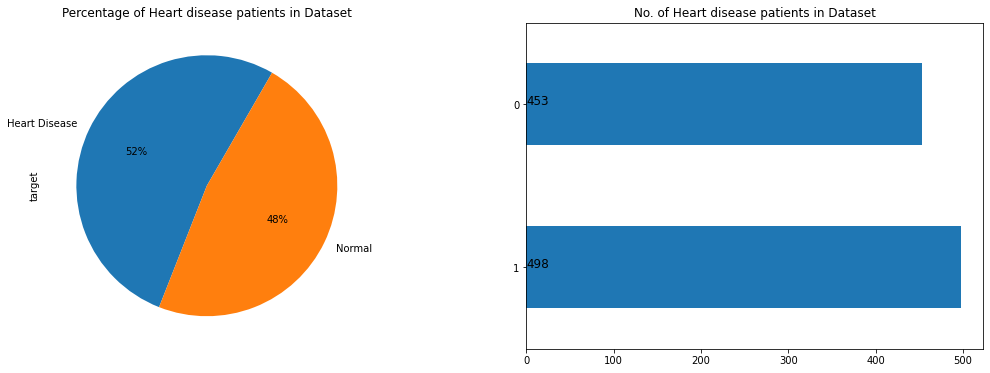

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting target distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()




The dataset is balanced having 498 heart disease patients and 453 normal patients

###2- Age Distribution of heart diseses pattents

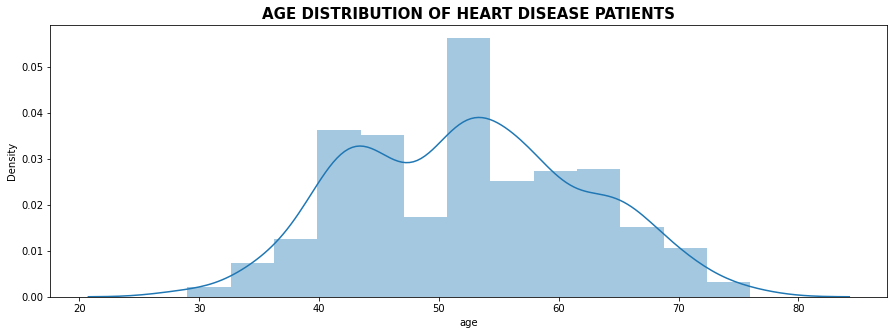

In [ ]:
#plotting  Age of heart patients
fig = plt.figure(figsize=(15,5))
# ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')
plt.show()

As we can see from above plot, in this dataset the average age of heart patients is around 55

### 3- Distribution of Chest Pain Type

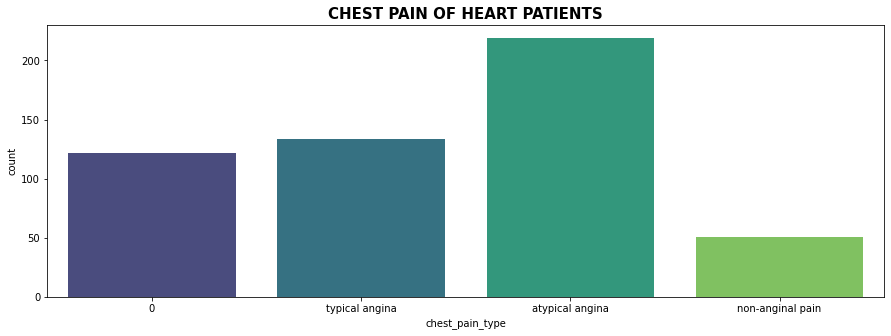

In [ ]:
# plotting heart patients
fig = plt.figure(figsize=(15,5))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()


As we can see from above plot  the chest pain type of the heart disease patients have a maximum at atypical angina chest pain.

### 4- Distribution of EGC

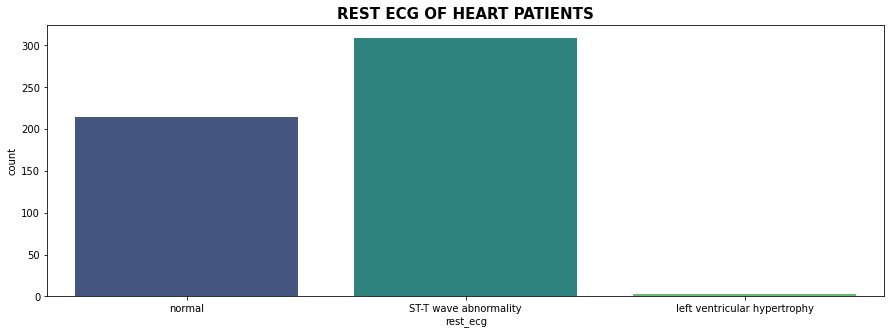

In [ ]:
# plotting heart patients
fig = plt.figure(figsize=(15,5))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot  the EGC rate of the heart disease patients have maximum at ST-T wave abnormality.

### 5- Distribution of ST SLOPE

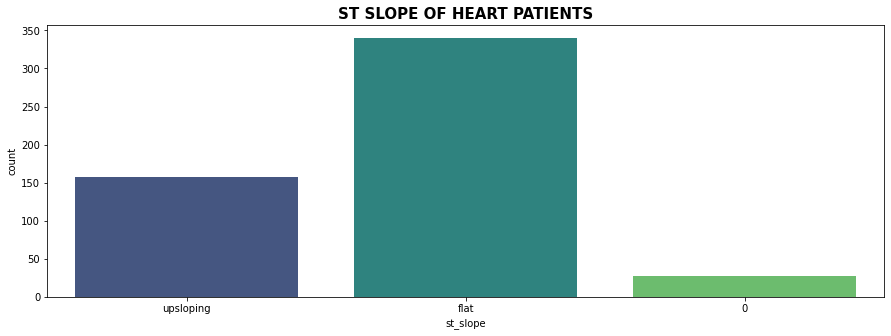

In [ ]:
#plotting heart patients
fig = plt.figure(figsize=(15,5))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers.

As we can see from above plot the  rate slope is Maximum at flat state .

### 6- Distribution of Numerical features

<Figure size 1080x360 with 0 Axes>

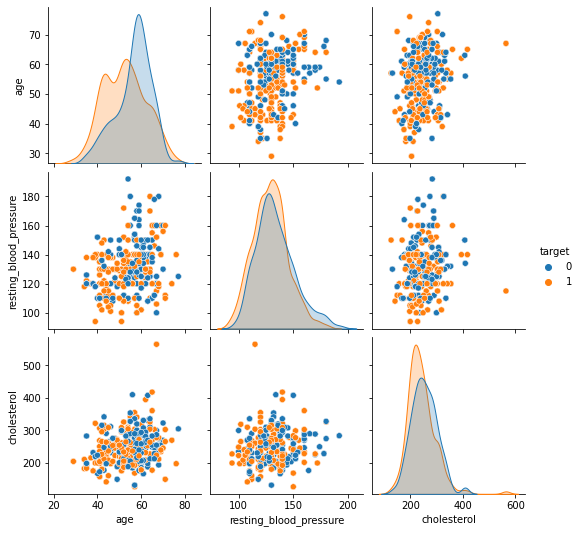

In [ ]:
# plotting for Distribution of Numerical features
fig = plt.figure(figsize=(15,5))
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )


From the above plot it is clear that as the age increases chances of heart disease increases

### 8- Checking Correlation 

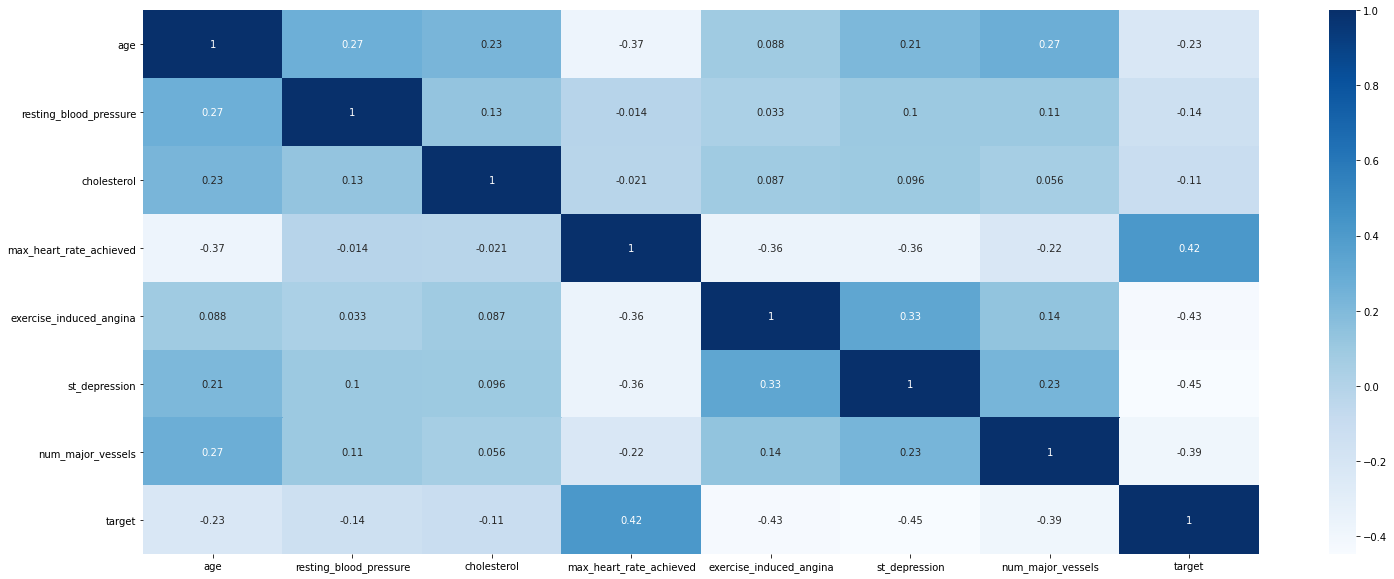

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(dt.corr(), annot=True , cmap= 'Blues')
# Save picture of plot


### This heatmap that show correlation rate between Target with other features .

##6- Model Building <a id='data-model'></a>

### 1- Comparing  Models 
In this section , we choose four different classifiers then we choose the best model according to the hiest accuracy score then we optimize this model.

### The machine learning algorithims used in the method are:

1.  LogisticRegression .

2.   KNeighborsClassifier.

3.   DecisionTreeClassifier

4.   RandomForestClassifier


### Encodeing categorical features

Now before splitting dataset into train and test we first encode categorical variables as dummy variables

In [ ]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,0,1.0,2,0,1,0,0,0,1,0,0,0,0,0,1
3,61,148,203,161,0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,62,138,294,106,0,1.9,3,0,0,0,0,0,0,0,0,1,1,0,0
5,58,100,248,122,0,1.0,0,1,0,0,0,0,1,0,1,1,1,0,0
7,55,160,289,145,1,0.8,1,0,1,0,0,0,1,0,1,1,0,0,1


### Spilt Data

In [ ]:
# Split data
X = dt.drop("target", axis=1)
y = dt["target"]
# splitting into train and test sets for both parameters
X_train,X_test ,y_train , y_test = train_test_split(X,y, test_size=0.7, random_state= 900)

In [ ]:
print(X,y)

      age  ...  thalassemia_reversable defect
0      52  ...                              1
3      61  ...                              1
4      62  ...                              0
5      58  ...                              0
7      55  ...                              1
...   ...  ...                            ...
1020   59  ...                              0
1021   60  ...                              1
1022   47  ...                              0
1023   50  ...                              0
1024   54  ...                              1

[951 rows x 18 columns] 0       0
3       0
4       0
5       1
7       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 951, dtype: int64


In [ ]:
len (X) 

951

In [ ]:
len(y)

951

###Baseline Score

In [ ]:
# Baseline Score
print("Model Baseline")
Basline_Score= dt["target"].value_counts(normalize=True)[1]
Basline_Score

Model Baseline


0.5236593059936908

### Classifiers and preprocessing techniques

In [ ]:
# Create a dictionary holding all Classifiers and preprocessing techniques
models = {
    "lr": make_pipeline(SimpleImputer(strategy="median"),LogisticRegression()),
    "knn": make_pipeline(SimpleImputer(strategy="median"),KNeighborsClassifier()),
    "dt": make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier()),
    "rf":make_pipeline(SimpleImputer(strategy="median"),RandomForestClassifier(random_state=900)),
    
}

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=9000)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# Evaluate models on their own

result_ls = []
model_ls = []

# Iterate over models dict and evaluate each seprately
for key, value in models.items():

    # gather scores KFold cross validation scores
    score = evaluate_model(value, X, y)
    result_ls.append(score) # save results
    model_ls.append(key) # save model name
    print(f"Model: {key}, Score: {np.mean(score)}")

Model: lr, Score: 0.840675117112152
Model: knn, Score: 0.7266023697988426
Model: dt, Score: 0.9894736842105264
Model: rf, Score: 0.9905345825296225


After Comparing Scores between all Classifier  :

Model: lr, Score: 0.840675117112152

Model: knn, Score: 0.7266023697988426

Model: dt, Score: 0.9878947368421052

Model: rf, Score: 0.9905345825296225

The best Score at Random Forest Classifier 


## 2- Build Random forest Model

In [ ]:
# Random Forseat Classifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)
prediction1 = rf.predict(X_test)


### classification_report of Model before grid search

In [ ]:
# classification_report Before grid search 
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       310
           1       0.92      0.93      0.92       356

    accuracy                           0.92       666
   macro avg       0.92      0.92      0.92       666
weighted avg       0.92      0.92      0.92       666



### confusion_matrix before grid search

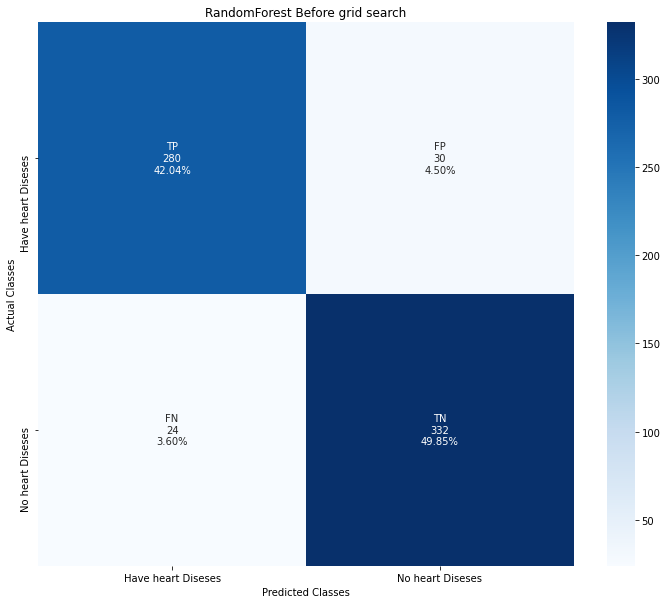

In [ ]:
# confusion_matrix Before grid search
cf = confusion_matrix(y_test, prediction1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Have heart Diseses', 'No heart Diseses']

plt.figure(figsize=(12,10))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("RandomForest Before grid search")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);


## 3- Grid Search 

In [ ]:
p_grid = {'criterion': ['gini', 'entropy'],
          'n_estimators':[100, 150, 20],
         
}

grid = GridSearchCV(rf, p_grid, cv=7)
grid.fit(X_train, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# show best parameter search to optimize model
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

### Random Forest After grid Search

In [ ]:
# model after grid_search 

rf_g=RandomForestClassifier(criterion= 'gini', n_estimators =100)

rf_g.fit(X_train,y_train)
prediction1 = rf_g.predict(X_test)


 ### classification_report After grid search 

In [ ]:
# classification_report after grid search 
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       310
           1       0.90      0.93      0.91       356

    accuracy                           0.91       666
   macro avg       0.91      0.91      0.91       666
weighted avg       0.91      0.91      0.91       666



### confusion_matrix after grid search

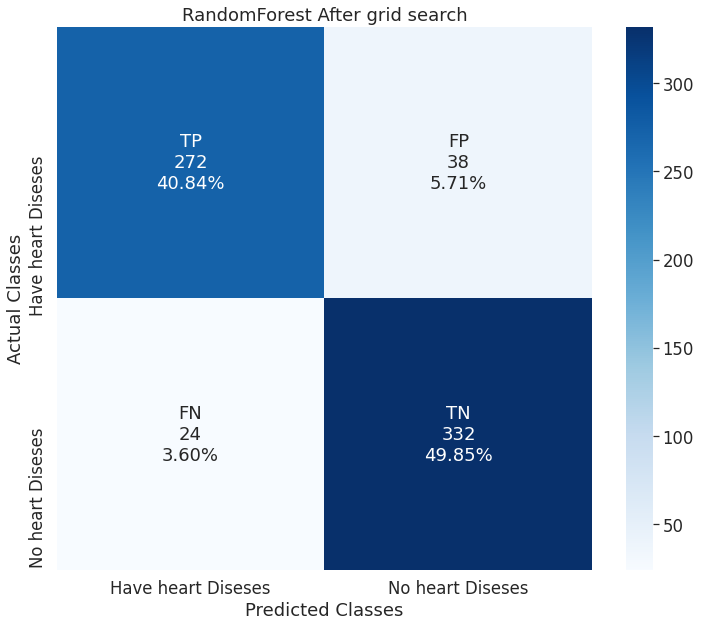

In [ ]:
# confusion_matrix after grid search
cf = confusion_matrix(y_test, prediction1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Have heart Diseses', 'No heart Diseses']

plt.figure(figsize=(12,10))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("RandomForest After grid search")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

Roc Curve

roc_auc_score for Random forseat Classifier before grid search:  0.9783390721275825
roc_auc_score for Random forseat Classifier after grid search:  0.9774193548387097


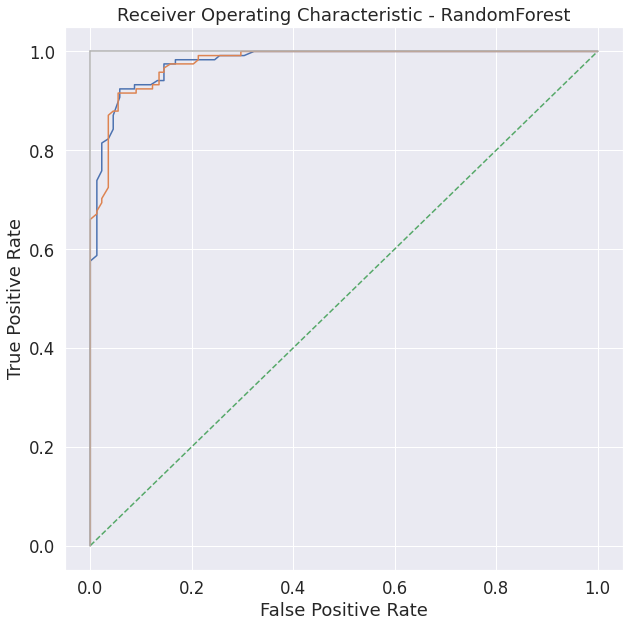

In [ ]:
# Getting predicted probabilities
y_score = rf.predict_proba(X_test)[:,1]
y_score_1= rf_g.predict_proba(X_test)[:,1]
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
false_positive_rate_1, true_positive_rate_1, threshold_1 = roc_curve(y_test, y_score_1)
print('roc_auc_score for Random forseat Classifier before grid search: ', roc_auc_score(y_test, y_score))
print('roc_auc_score for Random forseat Classifier after grid search: ', roc_auc_score(y_test, y_score_1))
# Ploting ROC curves
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate_1, true_positive_rate_1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7");

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

**Summary result of Roc curve :**

roc_auc_score for Random forseat Classifier before grid search =  **0.9772517216382748**

roc_auc_score for Random forseat Classifier after grid search =  **0.9783979702790866**